# Affective Dimension of UI Training : Comparing Pilot Data



In [1]:
import os 
import pandas as pd
import sqlite3
import seaborn as sns
from matplotlib import pyplot as plt

from util.survey_structure import MOTIVATION_8_PART_COLUMNS, MOTIVATION_8_PART_STATEMENTS

sns.set_theme(style="whitegrid")
sns.set_theme(rc={'figure.figsize':(11.7,8.27)})
sns.set_theme(font_scale=2)


# MY_DATA_PATH = "./data/noGuide_revised.db"
# FOLDER_NAME = "no-guide-second-iteration"

SPOTLIGHT_DATA_PATH = "./data/game-training-pilot2.db"
NOGUIDE_DATA_PATH = "./data/noGuide-revised-questionnaire.db"
# SIMON_DATA_PATH = "./data/simon-easier.db"
SIMON_DATA_PATH = "./data/simon-magnify.db"
# FOLDER_NAME = "spotlight-noguide-simon-easier-comparison"
FOLDER_NAME = "spotlight-noguide-simon-magnify-comparison"

# Note: this will all be reassigned to actual datasets below 
TRIAL_TABLE_NAME = "table_trialLog"
DEMOGRAPHICS = "questionnaire_demographics"
MOTIVATION_SHORT_ONE_NOGUIDE = "questionnaire_motivation_short_1"
MOTIVATION_SHORT_TWO_NOGUIDE = "questionnaire_motivation_short_2"
MOTIVATION_SHORT_THREE_NOGUIDE = "questionnaire_motivation_short_3"
MOTIVATION_SHORT_FOUR_NOGUIDE = "questionnaire_motivation_short_4"
MOTIVATION_SHORT_FIVE_NOGUIDE = "questionnaire_motivation_short_5"
MOTIVATION_SHORT_SIX_NOGUIDE = "questionnaire_motivation_short_6"
MOTIVATION_SHORT_SEVEN_NOGUIDE = "questionnaire_motivation_short_7"
MOTIVATION_SHORT_EIGHT_NOGUIDE = "questionnaire_motivation_short_8"
MOTIVATION_SHORT_NINE_NOGUIDE = "questionnaire_motivation_short_9"
MOTIVATION_SHORT_TEN_NOGUIDE = "questionnaire_motivation_short_10"
MOTIVATION_SHORT_ELEVEN_NOGUIDE = "questionnaire_motivation_short_11"
MOTIVATION_SHORT_TWELVE_NOGUIDE = "questionnaire_motivation_short_12"

MOTIVATION_SHORT_ONE = "questionnaire_motivation_short_1"
MOTIVATION_SHORT_TWO = "questionnaire_motivation_short_2"
MOTIVATION_SHORT_THREE = "questionnaire_motivation_short_3"
MOTIVATION_SHORT_FOUR = "questionnaire_motivation_short_4"
MOTIVATION_SHORT_FIVE = "questionnaire_motivation_short_5"
MOTIVATION_SHORT_SIX = "questionnaire_motivation_short_6"
MOTIVATION_SHORT_SEVEN = "questionnaire_motivation_short_7"
MOTIVATION_SHORT_EIGHT = "questionnaire_motivation_short_8"
MOTIVATION_SHORT_NINE = "questionnaire_motivation_short_9"
MOTIVATION_SHORT_TEN = "questionnaire_motivation_short_10"
MOTIVATION_SHORT_ELEVEN = "questionnaire_motivation_short_11"
MOTIVATION_SHORT_TWELVE = "questionnaire_motivation_short_12"


PARTICIPANT = "participant"
PROGRESS = "progress"


## Read in the data

In [2]:
spotlight_connection = sqlite3.connect(SPOTLIGHT_DATA_PATH)
cursor = spotlight_connection.cursor()

# reading all table names
table_list = [a for a in cursor.execute("SELECT name FROM sqlite_master WHERE type = 'table'")]

print("Your database contains the following tables:")
print(table_list)

SPOTLIGHT_TRIAL_DATA = pd.read_sql_query(f"SELECT *FROM {TRIAL_TABLE_NAME}", spotlight_connection)
SPOTLIGHT_DEMOGRAPHICS = pd.read_sql_query(f"SELECT * FROM {DEMOGRAPHICS}", spotlight_connection)
SPOTLIGHT_MOTIVATION_SHORT_ONE = pd.read_sql_query(f"SELECT * FROM {MOTIVATION_SHORT_ONE}", spotlight_connection)
SPOTLIGHT_MOTIVATION_SHORT_TWO = pd.read_sql_query(f"SELECT * FROM {MOTIVATION_SHORT_TWO}", spotlight_connection)
SPOTLIGHT_MOTIVATION_SHORT_THREE = pd.read_sql_query(f"SELECT * FROM {MOTIVATION_SHORT_THREE}", spotlight_connection)
SPOTLIGHT_MOTIVATION_SHORT_FOUR = pd.read_sql_query(f"SELECT * FROM {MOTIVATION_SHORT_FOUR}", spotlight_connection)
SPOTLIGHT_MOTIVATION_SHORT_FIVE = pd.read_sql_query(f"SELECT * FROM {MOTIVATION_SHORT_FIVE}", spotlight_connection)
SPOTLIGHT_MOTIVATION_SHORT_SIX = pd.read_sql_query(f"SELECT * FROM {MOTIVATION_SHORT_SIX}", spotlight_connection)
SPOTLIGHT_MOTIVATION_SHORT_SEVEN = pd.read_sql_query(f"SELECT * FROM {MOTIVATION_SHORT_SEVEN}", spotlight_connection)
SPOTLIGHT_MOTIVATION_SHORT_EIGHT = pd.read_sql_query(f"SELECT * FROM {MOTIVATION_SHORT_EIGHT}", spotlight_connection)
SPOTLIGHT_MOTIVATION_SHORT_NINE = pd.read_sql_query(f"SELECT * FROM {MOTIVATION_SHORT_NINE}", spotlight_connection)
SPOTLIGHT_MOTIVATION_SHORT_TEN = pd.read_sql_query(f"SELECT * FROM {MOTIVATION_SHORT_TEN}", spotlight_connection)
SPOTLIGHT_MOTIVATION_SHORT_ELEVEN = pd.read_sql_query(f"SELECT * FROM {MOTIVATION_SHORT_ELEVEN}", spotlight_connection)
SPOTLIGHT_MOTIVATION_SHORT_TWELVE = pd.read_sql_query(f"SELECT * FROM {MOTIVATION_SHORT_TWELVE}", spotlight_connection)
SPOTLIGHT_PARTICIPANT = pd.read_sql_query(f"SELECT * FROM {PARTICIPANT}", spotlight_connection)
SPOTLIGHT_PROGRESS = pd.read_sql_query(f"SELECT * FROM {PROGRESS}", spotlight_connection)
spotlight_connection.close()

Your database contains the following tables:
[('participant',), ('progress',), ('radio_grid_log',), ('display',), ('session_store',), ('questionnaire_motivation_short_9',), ('questionnaire_motivation_short_7',), ('questionnaire_motivation_short_5',), ('questionnaire_preferences',), ('questionnaire_motivation_short_11',), ('questionnaire_prolific_start',), ('questionnaire_motivation_short_1',), ('questionnaire_motivation_short_8',), ('questionnaire_demographics',), ('questionnaire_motivation_short_4',), ('questionnaire_motivation_short_3',), ('questionnaire_motivation_short_12',), ('questionnaire_motivation_short_2',), ('questionnaire_motivation_short_10',), ('questionnaire_motivation_short_6',), ('table_trialLog',), ('table_streamLog',)]


In [3]:
noguide_connection = sqlite3.connect(NOGUIDE_DATA_PATH)
cursor = noguide_connection.cursor()

# reading all table names
table_list = [a for a in cursor.execute("SELECT name FROM sqlite_master WHERE type = 'table'")]

print("Your database contains the following tables:")
print(table_list)

NOGUIDE_TRIAL_DATA = pd.read_sql_query(f"SELECT *FROM {TRIAL_TABLE_NAME}", noguide_connection)
NOGUIDE_DEMOGRAPHICS = pd.read_sql_query(f"SELECT * FROM {DEMOGRAPHICS}", noguide_connection)
NOGUIDE_MOTIVATION_SHORT_ONE = pd.read_sql_query(f"SELECT * FROM {MOTIVATION_SHORT_ONE_NOGUIDE}", noguide_connection)
NOGUIDE_MOTIVATION_SHORT_TWO = pd.read_sql_query(f"SELECT * FROM {MOTIVATION_SHORT_TWO_NOGUIDE}", noguide_connection)
NOGUIDE_MOTIVATION_SHORT_THREE = pd.read_sql_query(f"SELECT * FROM {MOTIVATION_SHORT_THREE_NOGUIDE}", noguide_connection)
NOGUIDE_MOTIVATION_SHORT_FOUR = pd.read_sql_query(f"SELECT * FROM {MOTIVATION_SHORT_FOUR_NOGUIDE}", noguide_connection)
NOGUIDE_MOTIVATION_SHORT_FIVE = pd.read_sql_query(f"SELECT * FROM {MOTIVATION_SHORT_FIVE_NOGUIDE}", noguide_connection)
NOGUIDE_MOTIVATION_SHORT_SIX = pd.read_sql_query(f"SELECT * FROM {MOTIVATION_SHORT_SIX_NOGUIDE}", noguide_connection)
NOGUIDE_MOTIVATION_SHORT_SEVEN = pd.read_sql_query(f"SELECT * FROM {MOTIVATION_SHORT_SEVEN_NOGUIDE}", noguide_connection)
NOGUIDE_MOTIVATION_SHORT_EIGHT = pd.read_sql_query(f"SELECT * FROM {MOTIVATION_SHORT_EIGHT_NOGUIDE}", noguide_connection)
NOGUIDE_MOTIVATION_SHORT_NINE = pd.read_sql_query(f"SELECT * FROM {MOTIVATION_SHORT_NINE_NOGUIDE}", noguide_connection)
NOGUIDE_MOTIVATION_SHORT_TEN = pd.read_sql_query(f"SELECT * FROM {MOTIVATION_SHORT_TEN_NOGUIDE}", noguide_connection)
NOGUIDE_MOTIVATION_SHORT_ELEVEN = pd.read_sql_query(f"SELECT * FROM {MOTIVATION_SHORT_ELEVEN_NOGUIDE}", noguide_connection)
NOGUIDE_MOTIVATION_SHORT_TWELVE = pd.read_sql_query(f"SELECT * FROM {MOTIVATION_SHORT_TWELVE_NOGUIDE}", noguide_connection)
NOGUIDE_PARTICIPANT = pd.read_sql_query(f"SELECT * FROM {PARTICIPANT}", noguide_connection)
NOGUIDE_PROGRESS = pd.read_sql_query(f"SELECT * FROM {PROGRESS}", noguide_connection)
noguide_connection.close()

Your database contains the following tables:
[('participant',), ('progress',), ('radio_grid_log',), ('display',), ('session_store',), ('questionnaire_motivation_short_9',), ('questionnaire_motivation_short_7',), ('questionnaire_motivation',), ('questionnaire_motivation_short_5',), ('questionnaire_preferences',), ('questionnaire_motivation_short_11',), ('questionnaire_prolific_start',), ('questionnaire_motivation_questionnaire_revised',), ('questionnaire_motivation_short_1',), ('questionnaire_motivation_short_8',), ('questionnaire_demographics',), ('questionnaire_motivation_short_4',), ('questionnaire_motivation_short_3',), ('questionnaire_motivation_short_12',), ('questionnaire_motivation_short_2',), ('questionnaire_motivation_short_10',), ('questionnaire_motivation_short_6',), ('table_trialLog',), ('table_streamLog',)]


In [4]:
simon_connection = sqlite3.connect(SIMON_DATA_PATH)
cursor = simon_connection.cursor()

# reading all table names
table_list = [a for a in cursor.execute("SELECT name FROM sqlite_master WHERE type = 'table'")]

print("Your database contains the following tables:")
print(table_list)

SIMON_TRIAL_DATA = pd.read_sql_query(f"SELECT *FROM {TRIAL_TABLE_NAME}", simon_connection)
SIMON_DEMOGRAPHICS = pd.read_sql_query(f"SELECT * FROM {DEMOGRAPHICS}", simon_connection)
SIMON_MOTIVATION_SHORT_ONE = pd.read_sql_query(f"SELECT * FROM {MOTIVATION_SHORT_ONE}",  simon_connection)
SIMON_MOTIVATION_SHORT_TWO = pd.read_sql_query(f"SELECT * FROM {MOTIVATION_SHORT_TWO}",  simon_connection)
SIMON_MOTIVATION_SHORT_THREE = pd.read_sql_query(f"SELECT * FROM {MOTIVATION_SHORT_THREE}",  simon_connection)
SIMON_MOTIVATION_SHORT_FOUR = pd.read_sql_query(f"SELECT * FROM {MOTIVATION_SHORT_FOUR}",  simon_connection)
SIMON_MOTIVATION_SHORT_FIVE = pd.read_sql_query(f"SELECT * FROM {MOTIVATION_SHORT_FIVE}",  simon_connection)
SIMON_MOTIVATION_SHORT_SIX = pd.read_sql_query(f"SELECT * FROM {MOTIVATION_SHORT_SIX}",  simon_connection)
SIMON_MOTIVATION_SHORT_SEVEN = pd.read_sql_query(f"SELECT * FROM {MOTIVATION_SHORT_SEVEN}",  simon_connection)
SIMON_MOTIVATION_SHORT_EIGHT = pd.read_sql_query(f"SELECT * FROM {MOTIVATION_SHORT_EIGHT}",  simon_connection)
SIMON_MOTIVATION_SHORT_NINE = pd.read_sql_query(f"SELECT * FROM {MOTIVATION_SHORT_NINE}",  simon_connection)
SIMON_MOTIVATION_SHORT_TEN = pd.read_sql_query(f"SELECT * FROM {MOTIVATION_SHORT_TEN}",  simon_connection)
SIMON_MOTIVATION_SHORT_ELEVEN = pd.read_sql_query(f"SELECT * FROM {MOTIVATION_SHORT_ELEVEN}",  simon_connection)
SIMON_MOTIVATION_SHORT_TWELVE = pd.read_sql_query(f"SELECT * FROM {MOTIVATION_SHORT_TWELVE}",  simon_connection)
SIMON_PARTICIPANT = pd.read_sql_query(f"SELECT * FROM {PARTICIPANT}",  simon_connection)
SIMON_PROGRESS = pd.read_sql_query(f"SELECT * FROM {PROGRESS}",  simon_connection)
simon_connection.close()

Your database contains the following tables:
[('participant',), ('progress',), ('radio_grid_log',), ('display',), ('session_store',), ('questionnaire_motivation_short_9',), ('questionnaire_motivation_short_7',), ('questionnaire_motivation_short_5',), ('questionnaire_preferences',), ('questionnaire_motivation_short_11',), ('questionnaire_prolific_start',), ('questionnaire_motivation_short_1',), ('questionnaire_motivation_short_8',), ('questionnaire_demographics',), ('questionnaire_motivation_short_4',), ('questionnaire_motivation_short_3',), ('questionnaire_motivation_short_12',), ('questionnaire_motivation_short_2',), ('questionnaire_motivation_short_10',), ('questionnaire_motivation_short_6',), ('table_trialLog',), ('table_streamLog',)]


In [5]:
SPOTLIGHT_MOTIVATION_SHORT_ONE['block'] = 1
SPOTLIGHT_MOTIVATION_SHORT_TWO['block'] = 2
SPOTLIGHT_MOTIVATION_SHORT_THREE['block'] = 3
SPOTLIGHT_MOTIVATION_SHORT_FOUR['block'] = 4
SPOTLIGHT_MOTIVATION_SHORT_FIVE['block'] = 5
SPOTLIGHT_MOTIVATION_SHORT_SIX['block'] = 6
SPOTLIGHT_MOTIVATION_SHORT_SEVEN['block'] = 7
SPOTLIGHT_MOTIVATION_SHORT_EIGHT['block'] = 8
SPOTLIGHT_MOTIVATION_SHORT_NINE['block'] = 9
SPOTLIGHT_MOTIVATION_SHORT_TEN['block'] = 10
SPOTLIGHT_MOTIVATION_SHORT_ELEVEN['block'] = 11
SPOTLIGHT_MOTIVATION_SHORT_TWELVE['block'] = 12

SPOTLIGHT_IMI = pd.concat([SPOTLIGHT_MOTIVATION_SHORT_ONE, SPOTLIGHT_MOTIVATION_SHORT_TWO, SPOTLIGHT_MOTIVATION_SHORT_THREE, SPOTLIGHT_MOTIVATION_SHORT_FOUR,
                 SPOTLIGHT_MOTIVATION_SHORT_FIVE, SPOTLIGHT_MOTIVATION_SHORT_SIX, SPOTLIGHT_MOTIVATION_SHORT_SEVEN, SPOTLIGHT_MOTIVATION_SHORT_EIGHT,
                 SPOTLIGHT_MOTIVATION_SHORT_NINE, SPOTLIGHT_MOTIVATION_SHORT_TEN, SPOTLIGHT_MOTIVATION_SHORT_ELEVEN, SPOTLIGHT_MOTIVATION_SHORT_TWELVE], ignore_index=True)


In [6]:
NOGUIDE_MOTIVATION_SHORT_ONE['block'] = 1
NOGUIDE_MOTIVATION_SHORT_TWO['block'] = 2
NOGUIDE_MOTIVATION_SHORT_THREE['block'] = 3
NOGUIDE_MOTIVATION_SHORT_FOUR['block'] = 4
NOGUIDE_MOTIVATION_SHORT_FIVE['block'] = 5
NOGUIDE_MOTIVATION_SHORT_SIX['block'] = 6
NOGUIDE_MOTIVATION_SHORT_SEVEN['block'] = 7
NOGUIDE_MOTIVATION_SHORT_EIGHT['block'] = 8
NOGUIDE_MOTIVATION_SHORT_NINE['block'] = 9
NOGUIDE_MOTIVATION_SHORT_TEN['block'] = 10
NOGUIDE_MOTIVATION_SHORT_ELEVEN['block'] = 11
NOGUIDE_MOTIVATION_SHORT_TWELVE['block'] = 12

NOGUIDE_IMI = pd.concat([NOGUIDE_MOTIVATION_SHORT_ONE, NOGUIDE_MOTIVATION_SHORT_TWO, NOGUIDE_MOTIVATION_SHORT_THREE, NOGUIDE_MOTIVATION_SHORT_FOUR,
                 NOGUIDE_MOTIVATION_SHORT_FIVE, NOGUIDE_MOTIVATION_SHORT_SIX, NOGUIDE_MOTIVATION_SHORT_SEVEN, NOGUIDE_MOTIVATION_SHORT_EIGHT,
                 NOGUIDE_MOTIVATION_SHORT_NINE, NOGUIDE_MOTIVATION_SHORT_TEN, NOGUIDE_MOTIVATION_SHORT_ELEVEN, NOGUIDE_MOTIVATION_SHORT_TWELVE], ignore_index=True)


In [7]:
SIMON_MOTIVATION_SHORT_ONE['block'] = 1
SIMON_MOTIVATION_SHORT_TWO['block'] = 2
SIMON_MOTIVATION_SHORT_THREE['block'] = 3
SIMON_MOTIVATION_SHORT_FOUR['block'] = 4
SIMON_MOTIVATION_SHORT_FIVE['block'] = 5
SIMON_MOTIVATION_SHORT_SIX['block'] = 6
SIMON_MOTIVATION_SHORT_SEVEN['block'] = 7
SIMON_MOTIVATION_SHORT_EIGHT['block'] = 8
SIMON_MOTIVATION_SHORT_NINE['block'] = 9
SIMON_MOTIVATION_SHORT_TEN['block'] = 10
SIMON_MOTIVATION_SHORT_ELEVEN['block'] = 11
SIMON_MOTIVATION_SHORT_TWELVE['block'] = 12

SIMON_IMI = pd.concat([SIMON_MOTIVATION_SHORT_ONE, SIMON_MOTIVATION_SHORT_TWO, SIMON_MOTIVATION_SHORT_THREE, SIMON_MOTIVATION_SHORT_FOUR,
                 SIMON_MOTIVATION_SHORT_FIVE, SIMON_MOTIVATION_SHORT_SIX, SIMON_MOTIVATION_SHORT_SEVEN, SIMON_MOTIVATION_SHORT_EIGHT,
                 SIMON_MOTIVATION_SHORT_NINE, SIMON_MOTIVATION_SHORT_TEN, SIMON_MOTIVATION_SHORT_ELEVEN, SIMON_MOTIVATION_SHORT_TWELVE], ignore_index=True)


## Preprocessing

Of the participants who did not abandon the study, one participant timed out and another reported technical issues. There were additional records in the database generated from testing the study on the server. All of these are removed before analysis. 

After removing unusable data, there are 10 participants. 

In [8]:
# rename old names from guidance study 
NOGUIDE_TRIAL_DATA['condition'] = 'no-game'

In [9]:
# for first no guide iteration:
# IDs 1-3: Testing
# IDs 5, 8, 13: Technical issue, did not finish, timeout

NOGUIDE_IDS_TO_REMOVE = [1, 2]
SPOTLIGHT_IDS_TO_REMOVE = [1, 2]
SIMON_IDS_TO_REMOVE = [1, 2, 3, 4, 5, 7] 

SPOTLIGHT_TRIAL_DATA = SPOTLIGHT_TRIAL_DATA[~SPOTLIGHT_TRIAL_DATA["participantID"].isin(SPOTLIGHT_IDS_TO_REMOVE)]
SPOTLIGHT_DEMOGRAPHICS = SPOTLIGHT_DEMOGRAPHICS[~SPOTLIGHT_DEMOGRAPHICS["participantID"].isin(SPOTLIGHT_IDS_TO_REMOVE)]
SPOTLIGHT_IMI = SPOTLIGHT_IMI[~SPOTLIGHT_IMI["participantID"].isin(SPOTLIGHT_IDS_TO_REMOVE)]
SPOTLIGHT_PARTICIPANT = SPOTLIGHT_PARTICIPANT[~SPOTLIGHT_PARTICIPANT["participantID"].isin(SPOTLIGHT_IDS_TO_REMOVE)]

NOGUIDE_TRIAL_DATA = NOGUIDE_TRIAL_DATA[~NOGUIDE_TRIAL_DATA["participantID"].isin(NOGUIDE_IDS_TO_REMOVE)]
NOGUIDE_TRIAL_DATA = NOGUIDE_TRIAL_DATA[~NOGUIDE_TRIAL_DATA["participantID"].isin(NOGUIDE_IDS_TO_REMOVE)]
NOGUIDE_DEMOGRAPHICS = NOGUIDE_DEMOGRAPHICS[~NOGUIDE_DEMOGRAPHICS["participantID"].isin(NOGUIDE_IDS_TO_REMOVE)]
NOGUIDE_IMI = NOGUIDE_IMI[~NOGUIDE_IMI["participantID"].isin(NOGUIDE_IDS_TO_REMOVE)]
NOGUIDE_PARTICIPANT = NOGUIDE_PARTICIPANT[~NOGUIDE_PARTICIPANT["participantID"].isin(NOGUIDE_IDS_TO_REMOVE)]


SIMON_TRIAL_DATA = SIMON_TRIAL_DATA[~SIMON_TRIAL_DATA["participantID"].isin(SIMON_IDS_TO_REMOVE)]
SIMON_TRIAL_DATA = SIMON_TRIAL_DATA[~SIMON_TRIAL_DATA["participantID"].isin(SIMON_IDS_TO_REMOVE)]
SIMON_DEMOGRAPHICS = SIMON_DEMOGRAPHICS[~SIMON_DEMOGRAPHICS["participantID"].isin(SIMON_IDS_TO_REMOVE)]
SIMON_IMI = SIMON_IMI[~SIMON_IMI["participantID"].isin(SIMON_IDS_TO_REMOVE)]
SIMON_PARTICIPANT = SIMON_PARTICIPANT[~SIMON_PARTICIPANT["participantID"].isin(SIMON_IDS_TO_REMOVE)]



In [10]:
NOGUIDE_IMI.to_csv("no-guide-all-questionnaires.csv")
SPOTLIGHT_IMI.to_csv('spotlight-all-questionnaires.csv')
SIMON_IMI.to_csv('simon-all-questionnaires.csv')

## Demographic Data Overview


All participants were familiar with Micosoft applications and did not have colour vision deficiency. One participant reported that they did not have normal visual ability but declined to specify the nature of their visual disability. 

In [11]:
# DEMOGRAPHICS[["microsoftFamiliarity", "visionAbility", "CVD", "visionAblilityType"]]

The participants consisted of 8 women and 2 men. 

In [12]:


# sns.histplot(DEMOGRAPHICS["gender"])

Ages of participants ranged from 22 to 72.

In [13]:
# DEMOGRAPHICS['age'].max()
# DEMOGRAPHICS['age'].min()

# sns.histplot(DEMOGRAPHICS["age"])

In [14]:
# DEMOGRAPHICS["occupation"]

In [15]:
# sns.histplot(DEMOGRAPHICS['compUsage'])

In [16]:
# DEMOGRAPHICS['videoGameUsage']

In [17]:
# sns.histplot(DEMOGRAPHICS['videoGameUsage'])

## IMI Motivational Survey



In [18]:
# Note Side Effects: This function will alter the original dataframe (shallow copy)
def format_likert_data_for_histogram(df: pd.DataFrame, likert_columns: list) -> pd.DataFrame:
    for column_name in likert_columns:
        df[column_name] = df[column_name].replace('1 (Strongly Disagree)', '1')
        df[column_name] = df[column_name].replace('7 (Strongly Agree)', '7')
        df[column_name] = df[column_name].replace('4 (Neutral)', '4')
        df[column_name] = df[column_name].astype('int64')
    return df

In [19]:

SPOTLIGHT_IMI['condition'] = 'Searchlight'
NOGUIDE_IMI['condition'] = 'No Game'
SIMON_IMI['condition'] = 'Simon'
IMI = pd.concat([SPOTLIGHT_IMI, NOGUIDE_IMI, SIMON_IMI], ignore_index=True)
IMI.fillna(0, inplace=True)
IMI = format_likert_data_for_histogram(IMI, MOTIVATION_8_PART_COLUMNS)


if not os.path.exists(f"./plots/{FOLDER_NAME}/imi_overall/"):
    os.makedirs(f"./plots/{FOLDER_NAME}/imi_overall/")



for block in IMI['block'].unique():
    for likert_data in MOTIVATION_8_PART_COLUMNS:
        plt.figure()
        sns.histplot(data=IMI[IMI['block']==block], multiple='dodge', hue='condition', x=likert_data, binrange=(1, 7), discrete=True).set(title=MOTIVATION_8_PART_STATEMENTS[likert_data], xlabel="Likert Scale Response", ylabel="Count")
        plt.savefig(f"./plots/{FOLDER_NAME}/imi_overall/{likert_data}_block_{block}.png")
        plt.close()

### Combining All IMI Responses: Histograms

The below was meant for single datasets.

In [20]:
# if not os.path.exists(f"./plots/{FOLDER_NAME}/imi_all_surveys_histograms/"):
#     os.makedirs(f"./plots/{FOLDER_NAME}/imi_all_surveys_histograms/")

# sns.set_theme()
# for likert_data in MOTIVATION_SHORT_LIKERT_COLUMNS:
#     plt.figure()
#     sns.histplot(data=IMI, hue='block', multiple='dodge', x=likert_data, binrange=(1, 7), discrete=True).set(title=MOTIVATION_STATEMENTS[likert_data], xlabel="Likert Scale Response", ylabel="Count")
#     plt.savefig(f"./plots/{FOLDER_NAME}/imi_all_surveys_histograms/{likert_data}.png")
#     plt.close()

### Mean Response Per Statement Per Survey

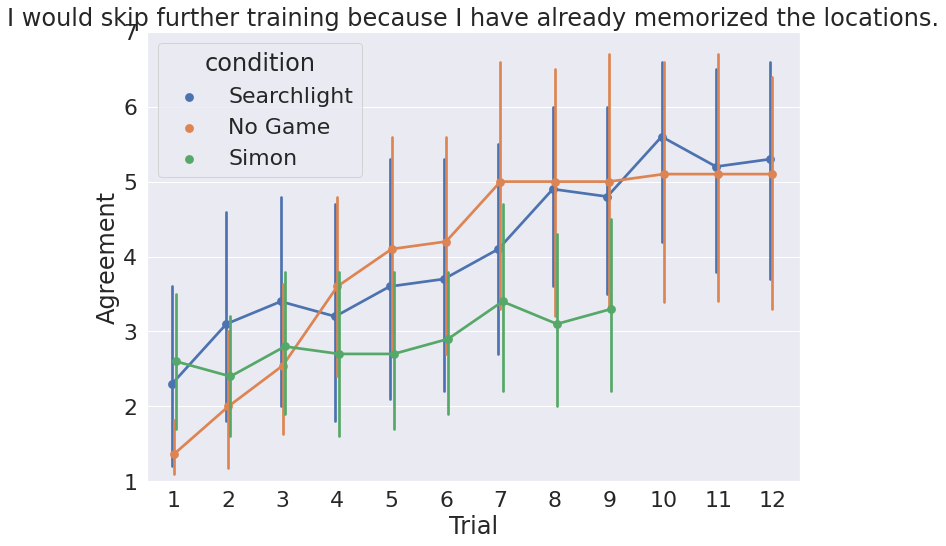

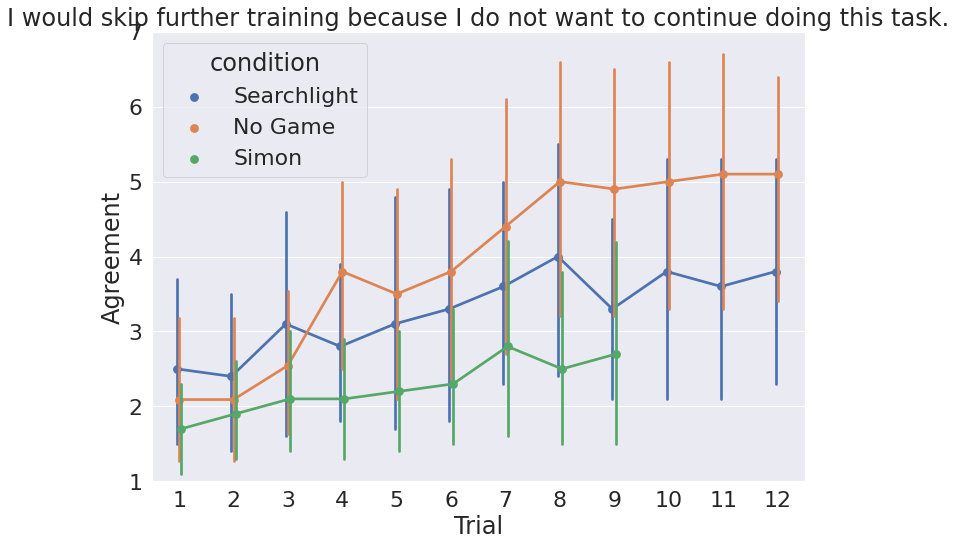

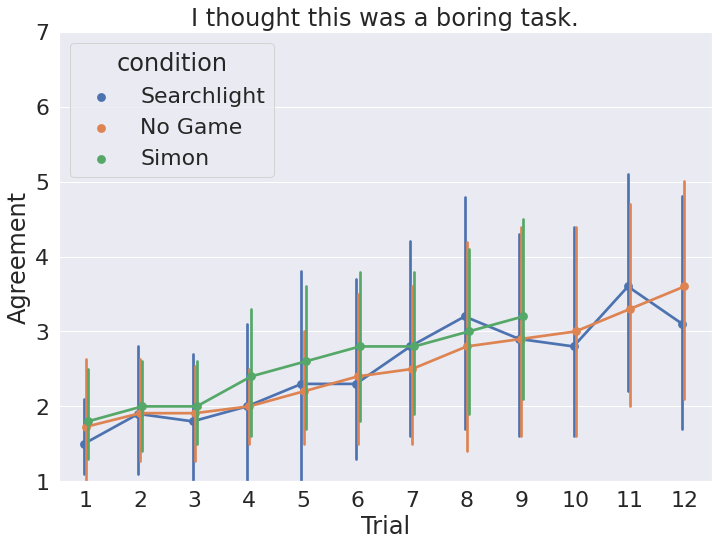

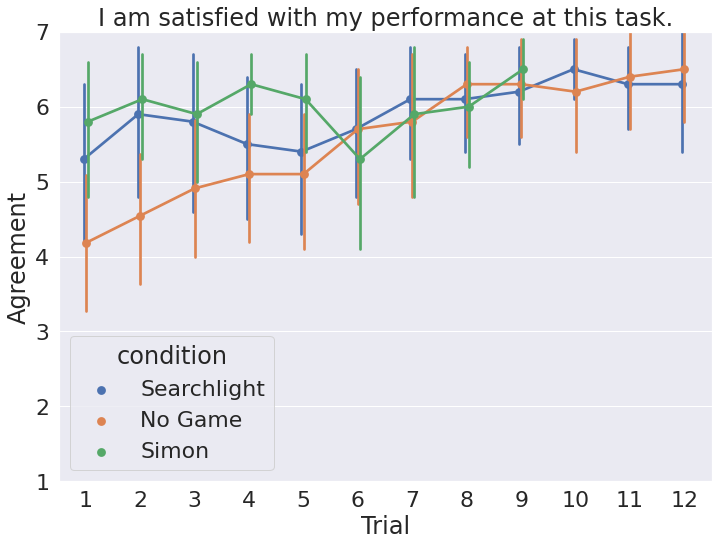

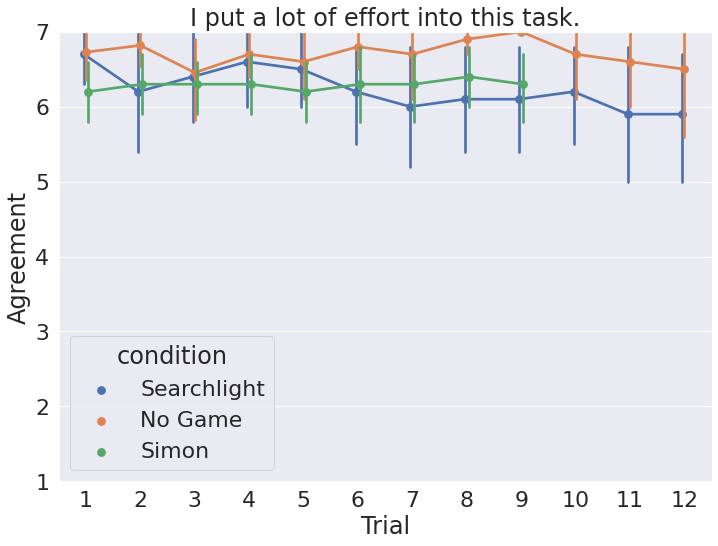

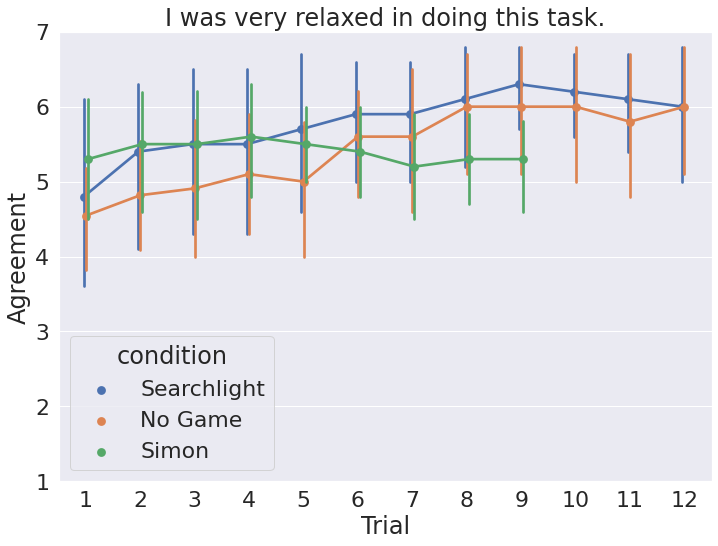

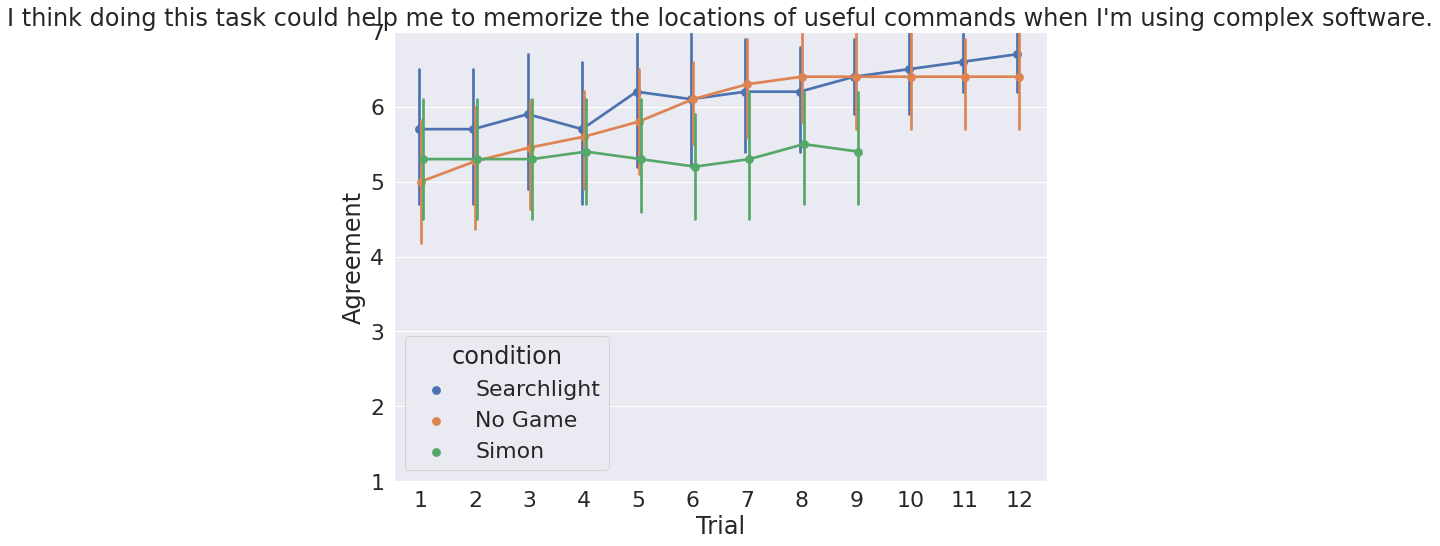

In [21]:

if not os.path.exists(f"./plots/{FOLDER_NAME}/imi_all_surveys_pointplots/"):
    os.makedirs(f"./plots/{FOLDER_NAME}/imi_all_surveys_pointplots/")

for likert_data in MOTIVATION_8_PART_COLUMNS:
    plt.figure()
    plt.ylim(1, 7)
    sns.pointplot(data=IMI, x='block', y=likert_data, hue='condition', dodge=True, errorbar=('ci', 95)).set(title=MOTIVATION_8_PART_STATEMENTS[likert_data], xlabel="Trial", ylabel="Agreement")
    plt.savefig(f"./plots/{FOLDER_NAME}/imi_all_surveys_pointplots/{likert_data}.png")

# IMI Scoring

Note that the standard IMI also measures Perceived Choice, however these "choice" questions were awkward in our survey and were excluded. 

In [22]:
REVERSE_SCORED_COLUMNS = ['boring_task', 'relaxed_task']

for col in REVERSE_SCORED_COLUMNS:
    IMI[col] = 8 - IMI[col]
    

In [23]:

# IMI_GUIDE = {
#     "Interest/Enjoyment": ['boring_task', 'enjoyable_task'],
#     "Perceived_Competence": ['satisfied_performance','couldnt_do_well'],
#     "Effort/Importance": ['effort_task', 'didnt_try_hard'],
#     "Tension/Pressure": ['felt_tense', 'relaxed_task'],
#     "Value/Usefulness": ['help_memorize_commands'],
#     # "Compliance": ['skip_remaining_training']
#     "Compliance": ['engagement']
# }

IMI_8_PART_GUIDE = {
    "Compliance-Targets_Memorized": ['already_memorized'],
    "Compliance-Nonengagement": ['dont_want_to_continue'],
    "Interest/Enjoyment": ['boring_task'],
    "Perceived_Competence": ['satisfied_performance'],
    "Effort/Importance": ['effort_task'],
    "Tension/Pressure": ['relaxed_task'],
    "Value/Usefulness": ['help_memorize_commands'],
}

In [24]:
for imi_category, imi_columns in IMI_8_PART_GUIDE.items():
    category_name:str = f'participant_{imi_category.lower().replace("/", "_")}'
    IMI[category_name] = 0
    for block in IMI['block'].unique():
        mean_participant_imi = IMI[IMI['block']==block][imi_columns].mean(axis=1)
        IMI.loc[(IMI['block']==block), [category_name]] = mean_participant_imi


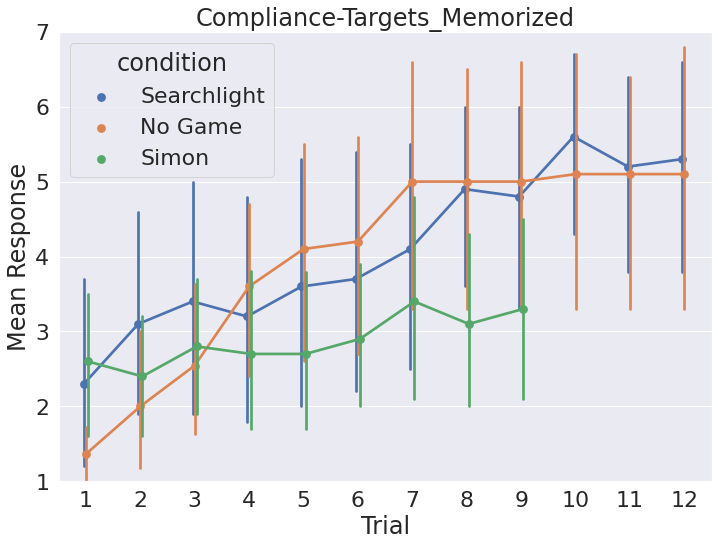

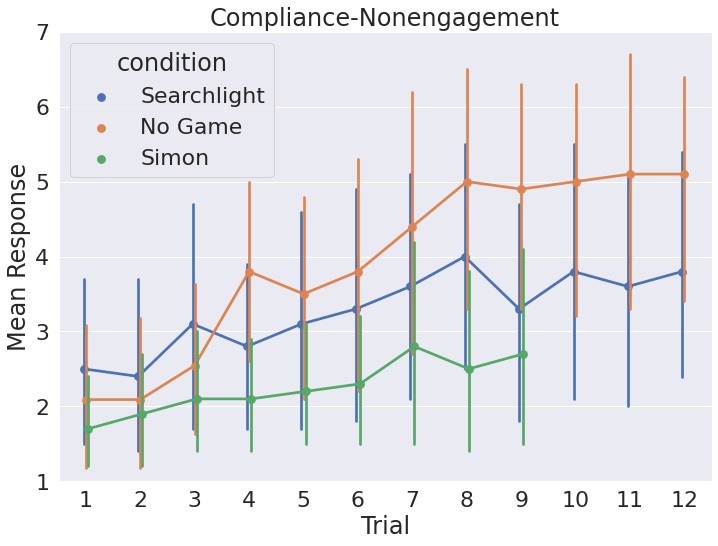

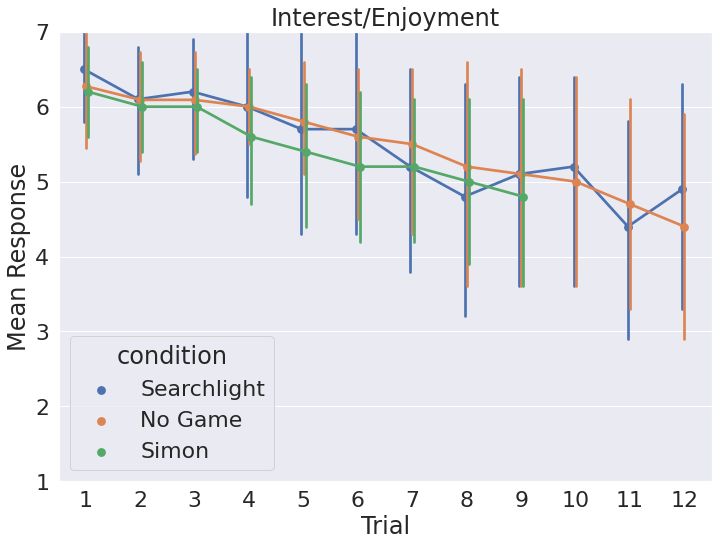

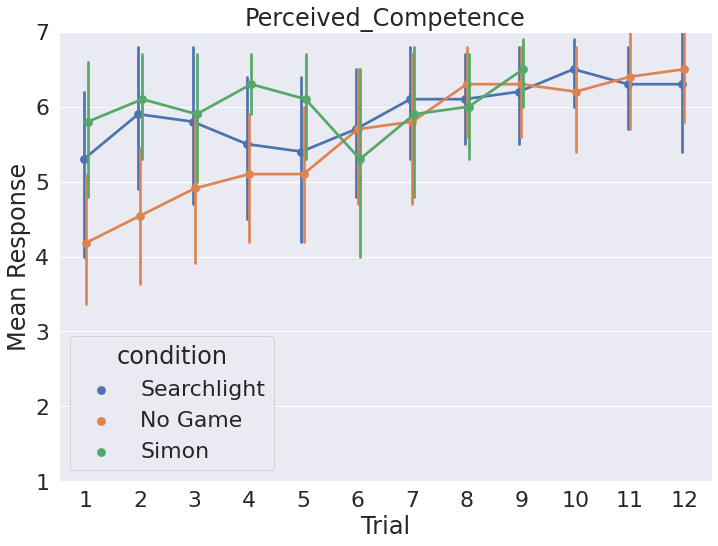

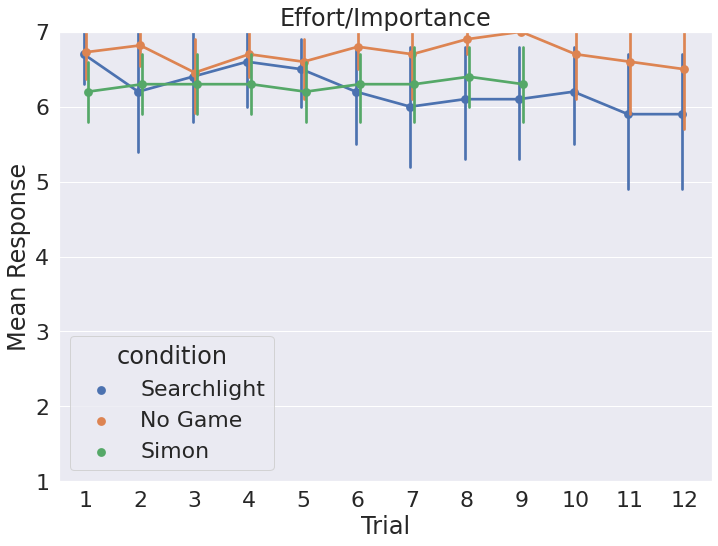

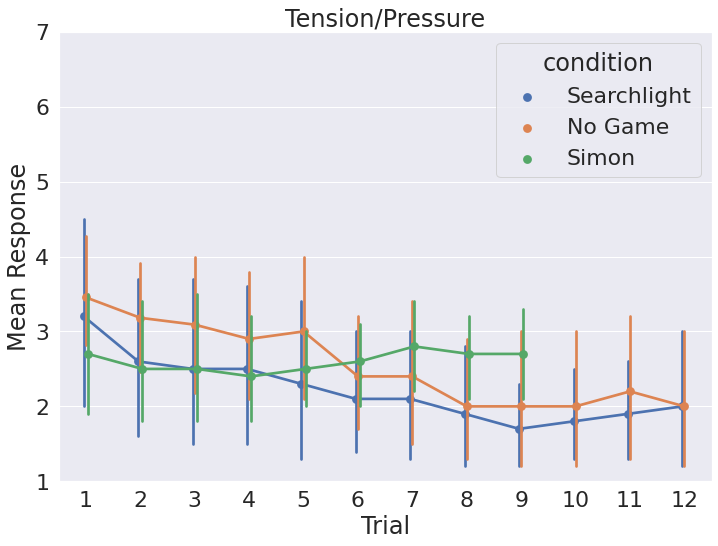

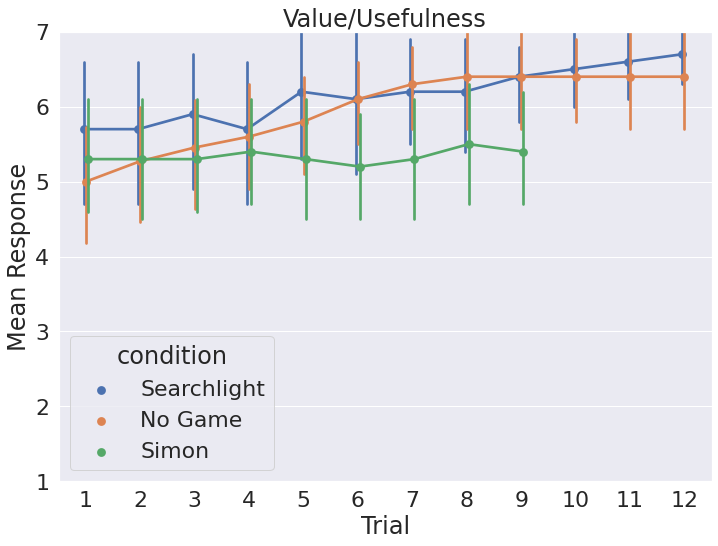

In [25]:
if not os.path.exists(f"./plots/{FOLDER_NAME}/imi_categories_pointplots/"):
    os.makedirs(f"./plots/{FOLDER_NAME}/imi_categories_pointplots/")

for imi_category in IMI_8_PART_GUIDE.keys():
    plt.figure()
    sns.pointplot(data=IMI , x='block', hue='condition', y=f'participant_{imi_category.lower().replace("/", "_")}', dodge=True, errorbar=('ci', 95)).set(title=imi_category, xlabel="Trial", ylabel="Mean Response")
    plt.ylim(1, 7)
    plt.savefig(f"./plots/{FOLDER_NAME}/imi_categories_pointplots/{imi_category.replace('/', '_')}.png")
    

# Trial Log Data

In [26]:

if not os.path.exists(f"./plots/{FOLDER_NAME}/trial_data/"):
    os.makedirs(f"./plots/{FOLDER_NAME}/trial_data/")


In [27]:
SIMON_TRIAL_DATA.columns

Index(['trialLogID', 'participantID', 'timeSubmitted', 'pid', 'condition',
       'prolificID', 'day', 'phase', 'block', 'trial', 'targetID', 'distEdge',
       'distLand', 'nearLandmark', 'isLandmark', 'targetX', 'targetY',
       'clickX', 'clickY', 'euclidean', 'manhattan', 'gameDistributionIndex',
       'cursorWidth', 'ct', 'underGuide', 'errors', 'movement', 'confidence',
       'errorObjects', 'cumulativeManhattanDistance',
       'cumulativeEuclideanDistance', 'sequence', 'manhattanDistanceLog',
       'euclideanDistanceLog'],
      dtype='object')

In [28]:
SIMON_TRIAL_DATA['trial'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [29]:

simon_trial_data_filtered = SIMON_TRIAL_DATA[SIMON_TRIAL_DATA['phase'] == 'training']
simon_trial_data = simon_trial_data_filtered.sort_values(['participantID', 'timeSubmitted'])
# simon_trial_data['trial_order'] = simon_trial_data.groupby('participantID').cumcount() + 1
simon_trial_data['trial_order'] = simon_trial_data_filtered['gameDistributionIndex'] + 1
simon_trial_data.to_csv('simon-trial-data.csv')


## Simon Game Trial - on error rate

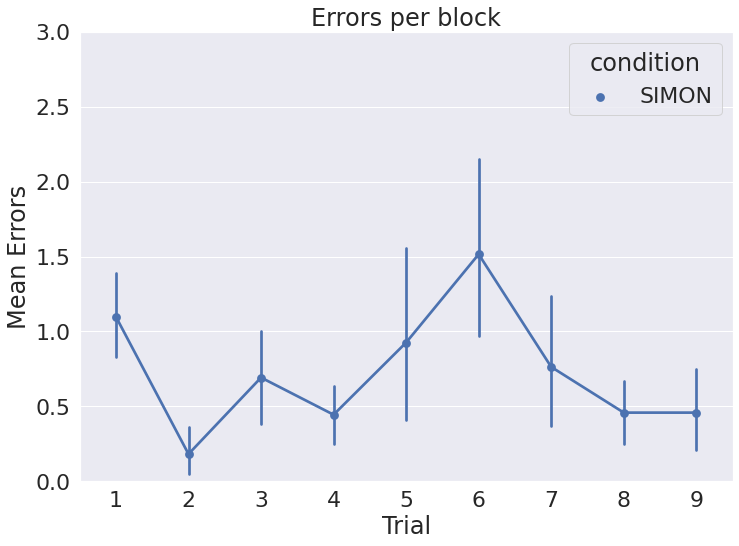

In [30]:
plt.figure()
sns.pointplot(data=simon_trial_data , x='trial_order', hue='condition', y=f'errors', dodge=True, errorbar=('ci', 95)).set(title="Errors per block", xlabel="Trial", ylabel="Mean Errors")
plt.ylim(0, 3)
plt.savefig(f"./plots/{FOLDER_NAME}/trial_data/simon_errors_per_block.png")

## No Guide and Spotlight: Time to complete trial

Because the targets are randomized, the mean time to successfully complete the trial was calculated for each block (set of 8 targets).

In [31]:

spotlight_trial_data_filtered = SPOTLIGHT_TRIAL_DATA[SPOTLIGHT_TRIAL_DATA['phase'] == 'training']
spotlight_successful_trials = spotlight_trial_data_filtered[spotlight_trial_data_filtered['manhattan']==0]
spotlight_successful_trials = spotlight_trial_data_filtered[spotlight_trial_data_filtered['errors']==0]
spotlight_successful_trials = spotlight_successful_trials.sort_values(['participantID', 'timeSubmitted'])
spotlight_successful_trials['trial_order'] = spotlight_successful_trials.groupby('participantID').cumcount() + 1
spotlight_successful_trials['block_order'] = spotlight_successful_trials['trial_order'].apply(lambda x: (x - 1) // 8 + 1)

noguide_trial_data_filtered = NOGUIDE_TRIAL_DATA[NOGUIDE_TRIAL_DATA['phase'] == 'training']
noguide_successful_trials = noguide_trial_data_filtered[noguide_trial_data_filtered['manhattan']==0]
noguide_successful_trials = noguide_trial_data_filtered[noguide_trial_data_filtered['errors']==0]
noguide_successful_trials = noguide_successful_trials.sort_values(['participantID', 'timeSubmitted'])
noguide_successful_trials['trial_order'] = noguide_successful_trials.groupby('participantID').cumcount() + 1
noguide_successful_trials['block_order'] = noguide_successful_trials['trial_order'].apply(lambda x: (x - 1) // 8 + 1)

In [32]:

spotlight_successful_trials['condition'] = 'Searchlight'
noguide_successful_trials['condition'] = 'No Game'
trial_data = pd.concat([spotlight_successful_trials, noguide_successful_trials], ignore_index=True)

trial_data.columns

trial_data['mean_ct'] = 100
for condition in trial_data['condition'].unique():
    for num_block in trial_data['block_order'].unique():
        for participant in trial_data['participantID'].unique():
            mean_ct = trial_data[(trial_data['block_order']==num_block) & (trial_data['participantID'] == participant) & (trial_data['condition']==condition)]['ct'].mean()
            trial_data.loc[(trial_data['block_order']==num_block) & (trial_data['participantID'] == participant) & (trial_data['condition']==condition), ['mean_ct']] = mean_ct 


In [33]:
trial_data.to_csv("trial_data.csv")

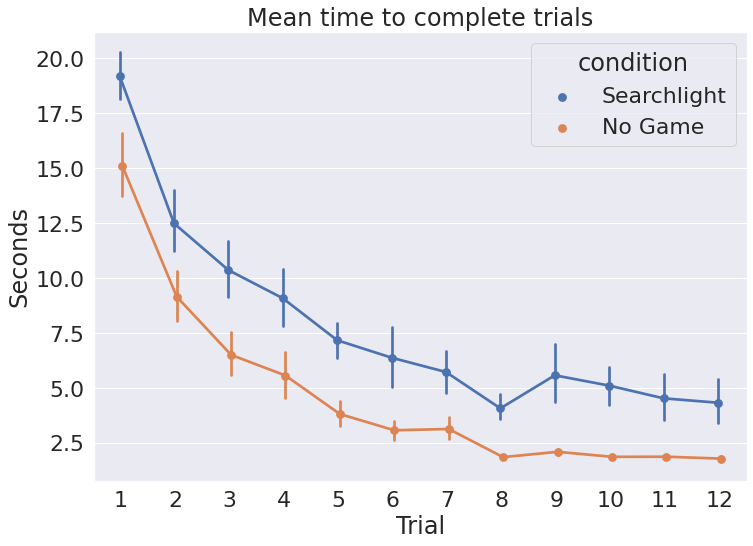

In [34]:


plt.figure()
sns.pointplot(data=trial_data, x='block_order', hue='condition', y=f'mean_ct', dodge=True, errorbar=('ci', 95)).set(title="Mean time to complete trials", xlabel="Trial", ylabel="Seconds")
plt.savefig(f"./plots/{FOLDER_NAME}/trial_data/time_to_complete.png")

## Mean time to complete trials per click

In [ ]:
GAME_CLICKS_LOOKUP = {
    0: 9,
    1: 9,
    2: 11,
    3: 9,
    4: 9,
    5: 11,
    6: 9,
    7: 9,
    8: 11
}


def get_mean_time_per_click(row):
    if row['condition'] is not 'simon':
        time_per_click = row['mean_ct']/8 # This is a bit of reverse engineering since with already had 'ct'
    else:
        row['block_order'] = row['gameDistributionIndex'] + 1
        # FIXME: we only have ct here, can't really add them all at this point 
        time_per_click = row['mean_ct']/GAME_CLICKS_LOOKUP[row['gameDistributionIndex']] # can calculate based on the block # right? I think 
    row['mean_time_per_click'] = time_per_click
    return row 


<>:15: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:15: SyntaxWarning: "is not" with a literal. Did you mean "!="?
/tmp/ipykernel_31546/1930127978.py:15: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if row['condition'] is not 'simon':


In [36]:
# FIXME: put this in a function I guess
simon_trial_data['mean_ct'] = 100
for num_block in simon_trial_data['gameDistributionIndex'].unique():
    for participant in simon_trial_data['participantID'].unique():
            mean_ct = simon_trial_data[(simon_trial_data['gameDistributionIndex']==num_block) & (simon_trial_data['participantID'] == participant)]['ct'].mean()
            simon_trial_data.loc[(simon_trial_data['gameDistributionIndex']==num_block) & (simon_trial_data['participantID'] == participant), ['mean_ct']] = mean_ct 

/tmp/ipykernel_31546/132404072.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  simon_trial_data['condition'] = 'simon'
/tmp/ipykernel_31546/132404072.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trial_data = trial_data.append(simon_trial_data, ignore_index=True)


simon
10.893275000035764
9
simon
10.893275000035764
9
simon
10.893275000035764
9
simon
10.893275000035764
9
simon
14.539250000059605
9
simon
14.539250000059605
9
simon
18.481100000023844
11
simon
18.481100000023844
11
simon
13.97575
9
simon
13.97575
9
simon
13.97575
9
simon
13.97575
9
simon
17.895099999964238
9
simon
17.895099999964238
9
simon
26.08805000001192
11
simon
26.08805000001192
11
simon
10.81546666665872
9
simon
10.81546666665872
9
simon
10.81546666665872
9
simon
16.54753333338102
9
simon
16.54753333338102
9
simon
16.54753333338102
9
simon
19.729199999988076
11
simon
19.729199999988076
11
simon
11.22877500000596
9
simon
11.22877500000596
9
simon
11.22877500000596
9
simon
11.22877500000596
9
simon
11.79465000000596
9
simon
11.79465000000596
9
simon
14.2595
11
simon
14.2595
11
simon
8.889833333333334
9
simon
8.889833333333334
9
simon
8.889833333333334
9
simon
13.058299999982118
9
simon
13.058299999982118
9
simon
16.143474999979137
11
simon
16.143474999979137
11
simon
16.1434749

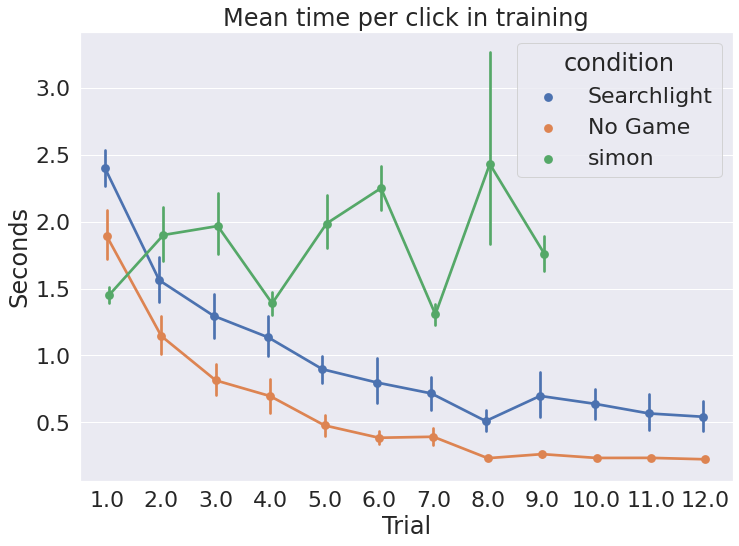

In [56]:
simon_trial_data['condition'] = 'simon'
trial_data = trial_data.append(simon_trial_data, ignore_index=True)

trial_data['mean_time_per_click'] = None
trial_data = trial_data.apply(lambda row: get_mean_time_per_click(row), axis=1)
 
plt.figure()
sns.pointplot(data=trial_data, x='block_order', hue='condition', y=f'mean_time_per_click', dodge=True, errorbar=('ci', 95)).set(title="Mean time per click in training", xlabel="Trial", ylabel="Seconds")
plt.savefig(f"./plots/{FOLDER_NAME}/trial_data/mean_time_per_click.png")


In [ ]:
# TODO: you can look up the sequence from the game distribution and then run, or just make sure it's stored in the next trial. 
def get_target_id_from_simon_sequence(row):
    if row['condition'] != 'simon':
        sequence_list = row['sequence']
        print(sequence_list)
    return row

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


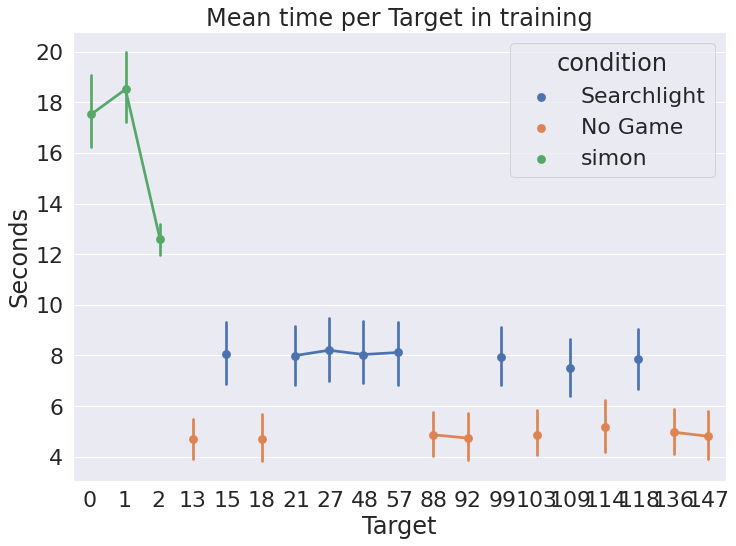

In [74]:
# mean time per target in training - need the target IDs to line up for this, and how to handle simon?

trial_data = trial_data.apply(lambda row: get_target_id_from_simon_sequence(row), axis=1)


plt.figure()
sns.pointplot(data=trial_data, x='targetID', hue='condition', y=f'mean_ct', dodge=True, errorbar=('ci', 95)).set(title="Mean time per Target in training", xlabel="Target", ylabel="Seconds")
plt.savefig(f"./plots/{FOLDER_NAME}/trial_data/mean_time_per_target.png")

## Memory Test Analysis

In [39]:

spotlight_test_data_filtered = SPOTLIGHT_TRIAL_DATA[SPOTLIGHT_TRIAL_DATA['phase'] == 'testing']
spotlight_test_data_ordered = spotlight_test_data_filtered.sort_values(['participantID', 'timeSubmitted'])
spotlight_test_data_ordered['test_order'] = spotlight_test_data_ordered.groupby('participantID').cumcount() + 1
spotlight_test_data_ordered['condition'] = 'Searchlight'


noguide_test_data_filtered = NOGUIDE_TRIAL_DATA[NOGUIDE_TRIAL_DATA['phase'] == 'testing']
noguide_test_data_ordered = noguide_test_data_filtered.sort_values(['participantID', 'timeSubmitted'])
noguide_test_data_ordered['test_order'] = noguide_test_data_ordered.groupby('participantID').cumcount() + 1
noguide_test_data_ordered['condition'] = 'No Game'

simon_test_data_filtered = SIMON_TRIAL_DATA[SIMON_TRIAL_DATA['phase'] == 'testing']
simon_test_data_ordered = simon_test_data_filtered.sort_values(['participantID', 'timeSubmitted'])
simon_test_data_ordered['test_order'] = simon_test_data_ordered.groupby('participantID').cumcount() + 1
simon_test_data_ordered['condition'] = 'Simon'

test_data = pd.concat([spotlight_test_data_ordered, noguide_test_data_ordered, simon_test_data_ordered], ignore_index=True)

In [40]:
ATTENTION_CHECK_IDS = [4, 8]


In [41]:
test_data = test_data[~test_data["test_order"].isin(ATTENTION_CHECK_IDS)]


In [42]:
test_data.to_csv("test_data.csv")

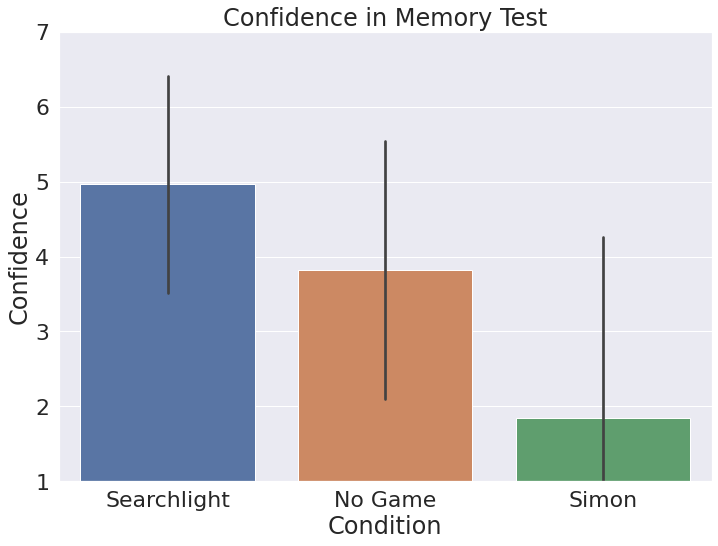

In [43]:
if not os.path.exists(f"./plots/{FOLDER_NAME}/test_data/"):
    os.makedirs(f"./plots/{FOLDER_NAME}/test_data/")

confidence = test_data[test_data['confidence']>0]

confidence = confidence[~confidence["test_order"].isin(ATTENTION_CHECK_IDS)]
# graph the mean engagement per trial order 
plt.figure()
sns.barplot(data=test_data, x='condition', y=f'confidence', ci='sd').set(title="Confidence in Memory Test", xlabel="Condition", ylabel="Confidence")
# sns.pointplot(data=confidence , x='test_order', hue='condition', y=f'confidence', dodge=True, errorbar=('ci', 95)).set(title="Reported confidence in selection", xlabel="Trial", ylabel="Reported Confidence")
plt.ylim(1, 7)
plt.savefig(f"./plots/{FOLDER_NAME}/test_data/confidence.png")


In [57]:
test_data.columns

Index(['trialLogID', 'participantID', 'timeSubmitted', 'pid', 'condition',
       'prolificID', 'day', 'phase', 'block', 'trial', 'targetID', 'distEdge',
       'distLand', 'nearLandmark', 'isLandmark', 'targetX', 'targetY',
       'clickX', 'clickY', 'euclidean', 'manhattan', 'ct', 'underGuide',
       'errors', 'movement', 'confidence', 'errorObjects', 'test_order',
       'engagement', 'gameDistributionIndex', 'cursorWidth',
       'cumulativeManhattanDistance', 'cumulativeEuclideanDistance',
       'sequence', 'manhattanDistanceLog', 'euclideanDistanceLog'],
      dtype='object')

In [59]:
test_data[test_data['condition']=='Simon']['targetID'].unique()

array([104,  46, 132,   0, 142, 129, 117, 120,  83])

In [60]:
test_data[test_data['condition']=='No Game']['targetID'].unique()

array([ 13, 114,  92, 136, 103,  18,  88, 147])

In [61]:
test_data[test_data['condition']=='Searchlight']['targetID'].unique()

array([ 27, 109,  15,  99, 118,  21,  57,  48])

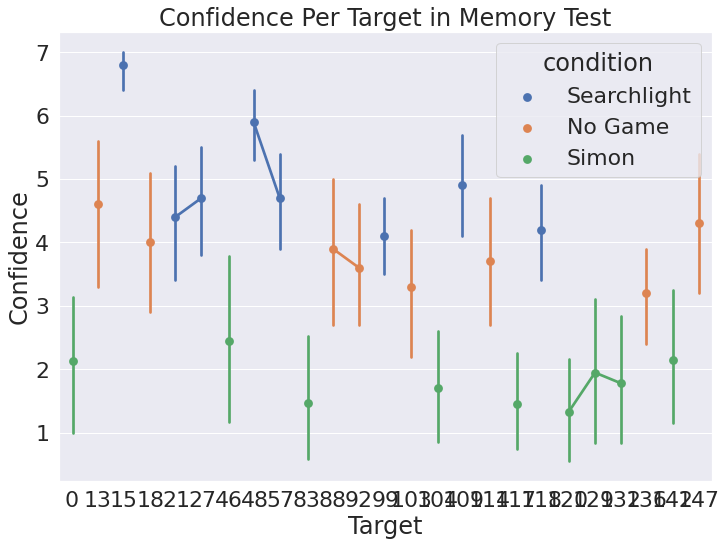

In [58]:
# confidence per target in memory test 
plt.figure()
sns.pointplot(data=test_data, x='targetID', hue='condition', y=f'confidence', dodge=True, errorbar=('ci', 95)).set(title="Confidence Per Target in Memory Test", xlabel="Target", ylabel="Confidence")
plt.savefig(f"./plots/{FOLDER_NAME}/test_data/confidence_per_target.png")

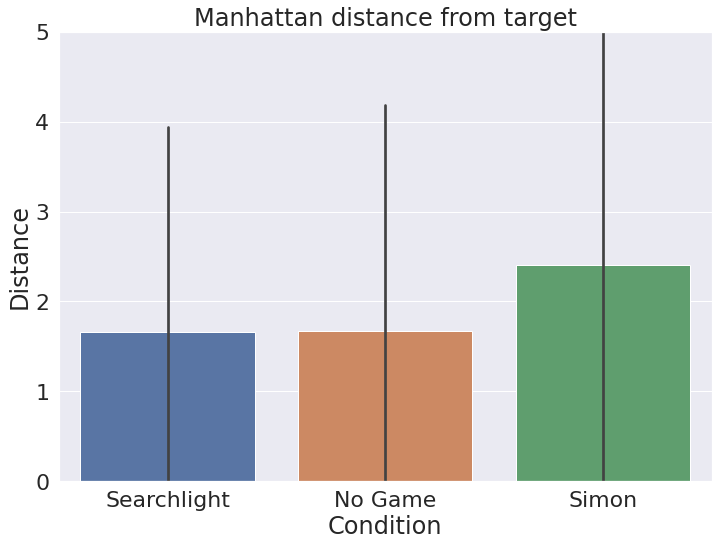

In [45]:
test_data = test_data[~test_data["test_order"].isin(ATTENTION_CHECK_IDS)]

plt.figure()
sns.barplot(data=test_data, x='condition', y=f'manhattan', ci='sd').set(title="Manhattan distance from target", xlabel="Condition", ylabel="Distance")

plt.ylim(0, 5)
plt.savefig(f"./plots/{FOLDER_NAME}/test_data/manhattan_test_performance.png")

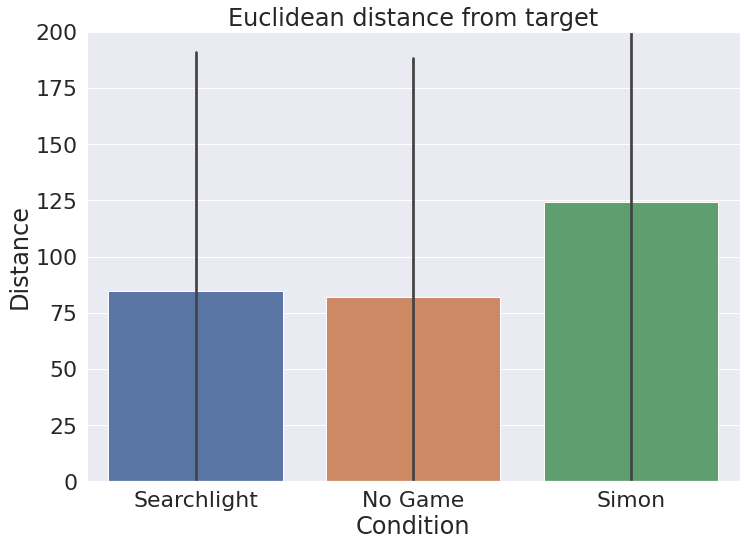

In [46]:


plt.figure()
sns.barplot(data=test_data, x='condition', y=f'euclidean', ci='sd').set(title="Euclidean distance from target", xlabel="Condition", ylabel="Distance")

plt.ylim(0, 200)
plt.savefig(f"./plots/{FOLDER_NAME}/test_data/euclidean_test_performance.png")

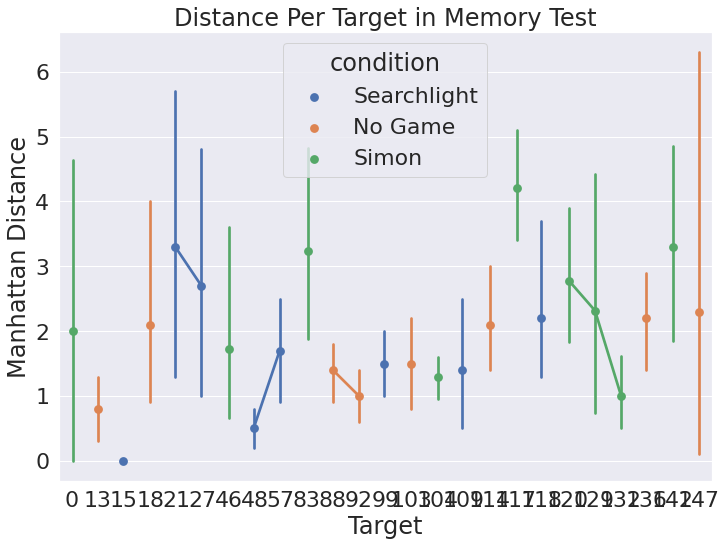

In [ ]:
plt.figure()
sns.pointplot(data=test_data, x='targetID', hue='condition', y=f'manhattan', dodge=True, errorbar=('ci', 95)).set(title="Distance Per Target in Memory Test", xlabel="Target", ylabel="Manhattan Distance")
plt.savefig(f"./plots/{FOLDER_NAME}/test_data/distance_per_target.png")

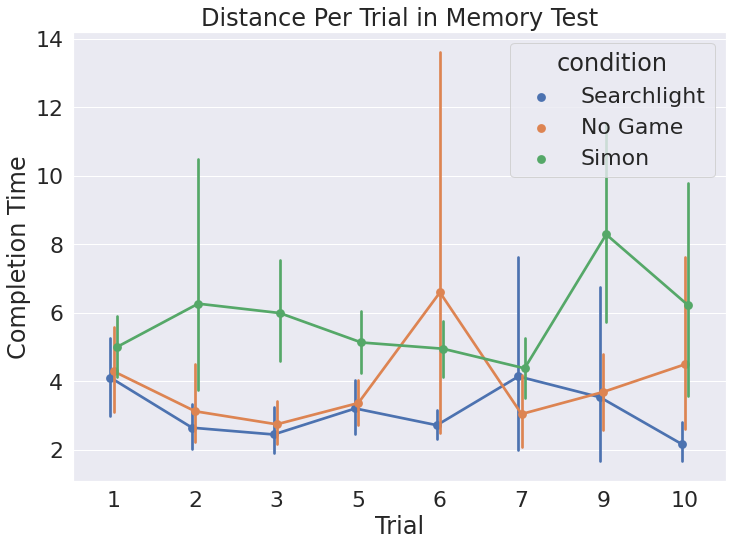

In [71]:

test_data.drop(test_data[test_data['trial'].isin([4, 8])].index, inplace=True)
plt.figure()
sns.pointplot(data=test_data, x='trial', hue='condition', y=f'ct', dodge=True, errorbar=('ci', 95)).set(title="Distance Per Trial in Memory Test", xlabel="Trial", ylabel="Completion Time")
plt.savefig(f"./plots/{FOLDER_NAME}/test_data/distance_per_target.png")

## Sequence Memory Test Analysis

In [47]:
simon_sequence_test_data = SIMON_TRIAL_DATA[SIMON_TRIAL_DATA['phase']=="sequence_testing"]
simon_sequence_test_data.columns

Index(['trialLogID', 'participantID', 'timeSubmitted', 'pid', 'condition',
       'prolificID', 'day', 'phase', 'block', 'trial', 'targetID', 'distEdge',
       'distLand', 'nearLandmark', 'isLandmark', 'targetX', 'targetY',
       'clickX', 'clickY', 'euclidean', 'manhattan', 'gameDistributionIndex',
       'cursorWidth', 'ct', 'underGuide', 'errors', 'movement', 'confidence',
       'errorObjects', 'cumulativeManhattanDistance',
       'cumulativeEuclideanDistance', 'sequence', 'manhattanDistanceLog',
       'euclideanDistanceLog'],
      dtype='object')

In [48]:
import numpy as np

simon_sequence_test_data['trial'] = np.where(simon_sequence_test_data['trial'] == 5, 4, simon_sequence_test_data['trial'])   

/tmp/ipykernel_31546/2791003237.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  simon_sequence_test_data['trial'] = np.where(simon_sequence_test_data['trial'] == 5, 4, simon_sequence_test_data['trial'])


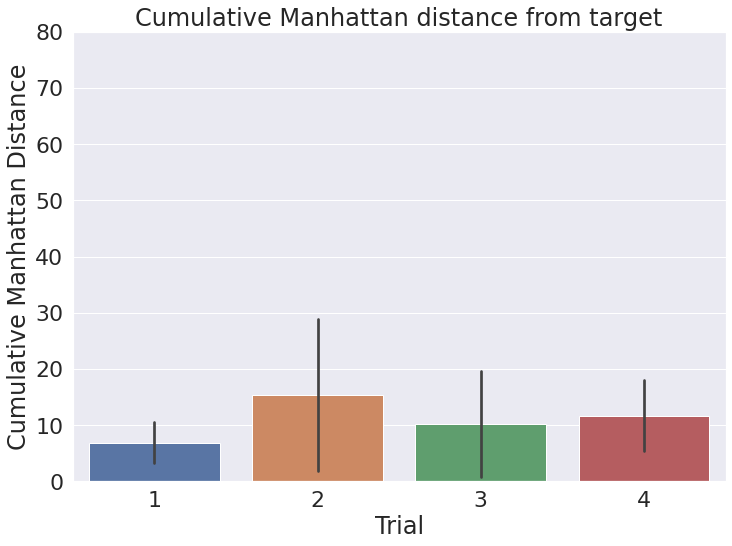

In [49]:

plt.figure()
sns.barplot(data=simon_sequence_test_data, x='trial', y=f'cumulativeManhattanDistance', ci='sd').set(title="Cumulative Manhattan distance from target", xlabel="Trial", ylabel="Cumulative Manhattan Distance")
\
plt.ylim(0,80)
plt.savefig(f"./plots/{FOLDER_NAME}/test_data/sequence_test_cumulative_manhattan_distance_from_targets.png")

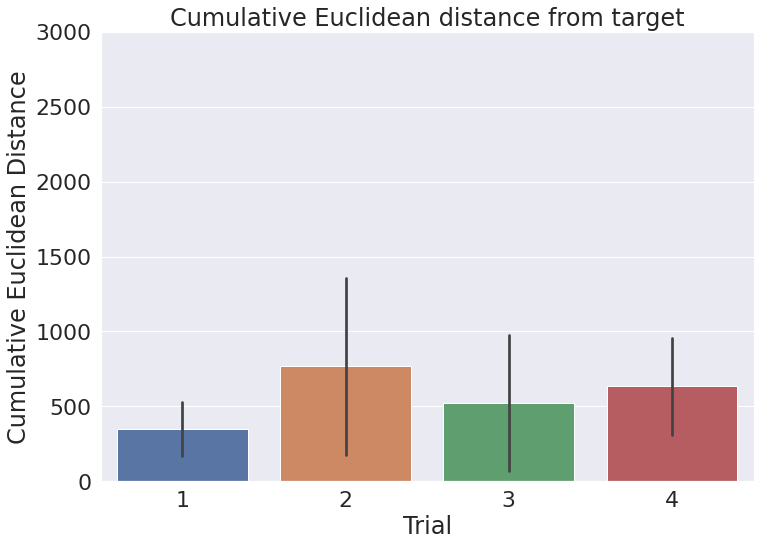

In [50]:
plt.figure()
sns.barplot(data=simon_sequence_test_data, x='trial', y=f'cumulativeEuclideanDistance', ci='sd').set(title="Cumulative Euclidean distance from target", xlabel="Trial", ylabel="Cumulative Euclidean Distance")
plt.ylim(0,3000)
plt.savefig(f"./plots/{FOLDER_NAME}/test_data/sequence_test_cumulative_euclidean_distance_from_targets.png")

In [51]:
# for each target in the sequence, show how far they were from it 
sequence_data = pd.DataFrame(simon_sequence_test_data[['manhattanDistanceLog', 'euclideanDistanceLog', 'sequence', 'trial']])

sequence_data.dtypes

def getMeanManhattanDistanceFromString(s: str)-> int:
    split_s = s.split(',')
    total =0
    for substring in split_s:
        total+=int(substring)
    return total/len(split_s)


def getMeanEuclideanDistanceFromString(s: str)-> float:
    split_s = s.split(',')
    total =0
    for substring in split_s:
        total+=float(substring)
    return total/len(split_s)


sequence_data['mean_manhattan_distance_per_target'] = sequence_data['manhattanDistanceLog'].apply(lambda x: getMeanManhattanDistanceFromString(x))
sequence_data['mean_euclidean_distance_per_target'] = sequence_data['euclideanDistanceLog'].apply(lambda x: getMeanEuclideanDistanceFromString(x))



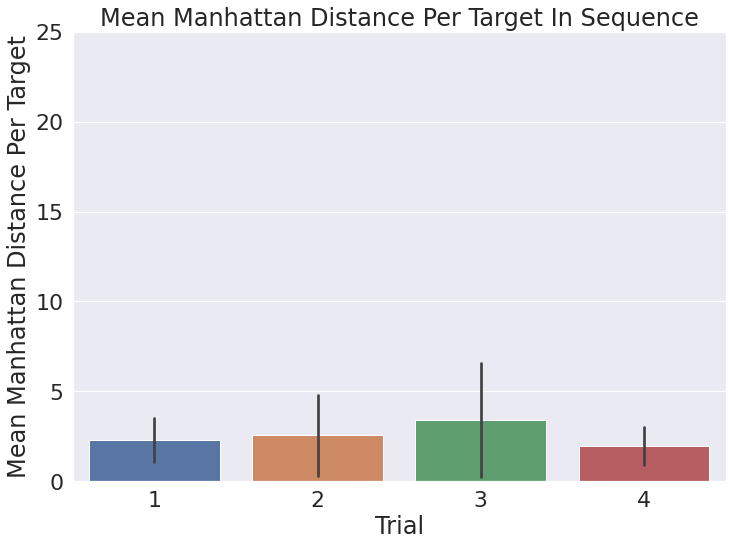

In [52]:
plt.figure()
sns.barplot(data=sequence_data, x='trial', y=f'mean_manhattan_distance_per_target', ci='sd').set(title="Mean Manhattan Distance Per Target In Sequence", xlabel="Trial", ylabel="Mean Manhattan Distance Per Target")
plt.ylim(0,25)
plt.savefig(f"./plots/{FOLDER_NAME}/test_data/sequence_test_mean_manhattan_distance_per_targets.png")

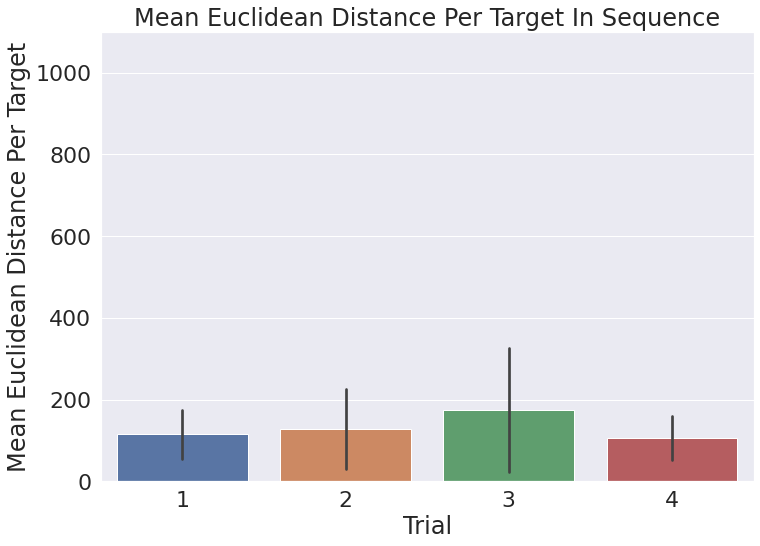

In [53]:
plt.figure()
sns.barplot(data=sequence_data, x='trial', y=f'mean_euclidean_distance_per_target', ci='sd').set(title="Mean Euclidean Distance Per Target In Sequence", xlabel="Trial", ylabel="Mean Euclidean Distance Per Target")
plt.ylim(0,1100)
plt.savefig(f"./plots/{FOLDER_NAME}/test_data/sequence_test_mean_euclidean_distance_per_targets.png")